In [3]:
import pandas as pd
import numpy as np
import json
import requests

In [209]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

ModuleNotFoundError: No module named 'tensorboard'

In [ ]:
import tensorflow as tf
import datetime

In [ ]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

def create_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

In [ ]:
model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])

In [ ]:
%tensorboard --logdir logs/fit

In [4]:
import os
os.environ['PROJ_LIB'] = '/opt/conda/pkgs/proj4-5.2.0-he1b5a44_1003/share/proj'

In [5]:
import datetime as dt  # Python standard library datetime  module
import numpy as np
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

In [7]:
from mpl_toolkits.basemap import Basemap

In [8]:
cd "E:\Hackathon_HackTheBay\Data\Water Temperature\2017"

E:\Hackathon_HackTheBay\Data\Water Temperature\2017


In [ ]:
import netCDF4
from netCDF4 import Dataset

dataset = netCDF4.MFDataset(['ICOADS_R3.0.1_2017-01.nc','ICOADS_R3.0.1_2017-02.nc','ICOADS_R3.0.1_2017-03.nc', \
                             'ICOADS_R3.0.1_2017-04.nc', 'ICOADS_R3.0.1_2017-05.nc', 'ICOADS_R3.0.1_2017-06.nc', \
                            'ICOADS_R3.0.1_2017-07.nc','ICOADS_R3.0.1_2017-08.nc','ICOADS_R3.0.1_2017-09.nc', \
                            'ICOADS_R3.0.1_2017-10.nc','ICOADS_R3.0.1_2017-11.nc','ICOADS_R3.0.1_2017-12.nc'])

In [9]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
from netCDF4 import Dataset, num2date
import time, calendar, datetime, numpy
#from mpl_toolkits.basemap import Basemap
#import matplotlib.pyplot as plt
import urllib, os

In [11]:
my_example_nc_file =r'''E:\Hackathon_HackTheBay\Data\Water Temperature\2017\ICOADS_R3.0.1_2017-01.nc'''
#/Volumes/Elements/RIT_Capstone_Project_Network/Data/NC Data/Capstone_Project_Data/NOAA
#/Users/joannechen/Creative Cloud Files/NOAA
fh = Dataset(my_example_nc_file, mode='r')

In [12]:
fh = Dataset(my_example_nc_file, mode='r')

In [13]:
'''
NAME
    NetCDF with Python
PURPOSE
    To demonstrate how to read and write data with NetCDF files using
    a NetCDF file from the NCEP/NCAR Reanalysis.
    Plotting using Matplotlib and Basemap is also shown.
PROGRAMMER(S)
    Chris Slocum
REVISION HISTORY
    20140320 -- Initial version created and posted online
    20140722 -- Added basic error handling to ncdump
                Thanks to K.-Michael Aye for highlighting the issue
REFERENCES
    netcdf4-python -- http://code.google.com/p/netcdf4-python/
    NCEP/NCAR Reanalysis -- Kalnay et al. 1996
        http://dx.doi.org/10.1175/1520-0477(1996)077<0437:TNYRP>2.0.CO;2
'''
import datetime as dt  # Python standard library datetime  module
import numpy as np
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid


def ncdump(nc_fid, verb=True):
    '''
    ncdump outputs dimensions, variables and their attribute information.
    The information is similar to that of NCAR's ncdump utility.
    ncdump requires a valid instance of Dataset.

    Parameters
    ----------
    nc_fid : netCDF4.Dataset
        A netCDF4 dateset object
    verb : Boolean
        whether or not nc_attrs, nc_dims, and nc_vars are printed

    Returns
    -------
    nc_attrs : list
        A Python list of the NetCDF file global attributes
    nc_dims : list
        A Python list of the NetCDF file dimensions
    nc_vars : list
        A Python list of the NetCDF file variables
    '''
    def print_ncattr(key):
        """
        Prints the NetCDF file attributes for a given key

        Parameters
        ----------
        key : unicode
            a valid netCDF4.Dataset.variables key
        """
        try:
            print ("\t\ttype:", repr(nc_fid.variables[key].dtype))
            for ncattr in nc_fid.variables[key].ncattrs():
                print ("\t\t%s:" % ncattr,\
                      repr(nc_fid.variables[key].getncattr(ncattr)))
        except KeyError:
            print ("\t\tWARNING: %s does not contain variable attributes" % key)

    # NetCDF global attributes
    nc_attrs = nc_fid.ncattrs()
    if verb:
        print ("NetCDF Global Attributes:")
        for nc_attr in nc_attrs:
            print ("\t%s:" % nc_attr, repr(nc_fid.getncattr(nc_attr)))
    nc_dims = [dim for dim in nc_fid.dimensions]  # list of nc dimensions
    # Dimension shape information.
    if verb:
        print ("NetCDF dimension information:")
        for dim in nc_dims:
            print ("\tName:", dim)
            print ("\t\tsize:", len(nc_fid.dimensions[dim]))
            print_ncattr(dim)
    # Variable information.
    nc_vars = [var for var in nc_fid.variables]  # list of nc variables
    if verb:
        print ("NetCDF variable information:")
        for var in nc_vars:
            if var not in nc_dims:
                print ("\tName:", var)
                print ("\t\tdimensions:", nc_fid.variables[var].dimensions)
                print ("\t\tsize:", nc_fid.variables[var].size)
                print_ncattr(var)
    return nc_attrs, nc_dims, nc_vars

In [14]:
nc_f = r"""E:\Hackathon_HackTheBay\Data\Water Temperature\2017\ICOADS_R3.0.1_2017-01.nc"""
nc_fid = Dataset(nc_f, 'r')  # Dataset is the class behavior to open the file
                             # and create an instance of the ncCDF4 class
nc_attrs, nc_dims, nc_vars = ncdump(nc_fid)

NetCDF Global Attributes:
	ncei_template_version: 'NCEI_NetCDF_Point_Template_v2.0'
	featureType: 'point'
	title: 'International Comprehensive Ocean-Atmosphere Data Set (ICOADS) R3.0.1 data collected from 2017-01-01T00:00:00Z to 2017-01-31T23:58:47Z.'
	summary: 'This file contains ICOADS R3.0.1 data in netCDF4 format collected from 2017-01-01T00:00:00Z to 2017-01-31T23:58:47Z. The International Comprehensive Ocean-Atmosphere Data Set (ICOADS) offers surface marine data spanning the past three centuries, and simple gridded monthly summary products for 2-degree latitude x 2-degree longitude boxes back to 1800 (and 1degreex1degree boxes since 1960)--these data and products are freely distributed worldwide. As it contains observations from many different observing systems encompassing the evolution of measurement technology over hundreds of years, ICOADS is probably the most complete and heterogeneous collection of surface marine data in existence.'
	keywords: 'Earth Science > Atmosphere >

In [15]:
nc_fid.variables.keys() # I want 'time', 'date', 'lat', 'lon',and 'SST'

dict_keys(['time', 'date', 'crs', 'HR', 'lat', 'lon', 'TI', 'LI', 'DS', 'VS', 'NID', 'II', 'ID', 'DI', 'D', 'WI', 'W', 'VV', 'WW', 'W1', 'SLP', 'A', 'PPP', 'IT', 'AT', 'WBTI', 'WBT', 'DPTI', 'DPT', 'SI', 'SST', 'N', 'NH', 'CL', 'H', 'CM', 'CH', 'WP', 'WH', 'SD', 'SP', 'SH', 'B10', 'B1', 'DCK', 'SID', 'PT', 'DUPS', 'DUPC', 'ND', 'SF', 'AF', 'UF', 'VF', 'PF', 'RF', 'ZNC', 'WNC', 'BNC', 'XNC', 'YNC', 'PNC', 'ANC', 'GNC', 'DNC', 'SNC', 'CNC', 'ENC', 'FNC', 'TNC', 'QCZ', 'IX', 'W2', 'SD2', 'SP2', 'SH2', 'IS', 'ES', 'RS', 'IC1', 'IC2', 'IC3', 'IC4', 'IC5', 'IR', 'RRR', 'TR', 'RH', 'RHI', 'UID', 'IRF'])

In [16]:
time_2017_01 = nc_fid.variables['time'][:]

In [17]:
date_2017_01 = nc_fid.variables['date'][:]

In [18]:
SST_2017_01 = nc_fid.variables['SST'][:]

<ipython-input-18-06ac91ab2ac6>:1: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  SST_2017_01 = nc_fid.variables['SST'][:]
<ipython-input-18-06ac91ab2ac6>:1: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  SST_2017_01 = nc_fid.variables['SST'][:]


In [19]:
time_2017_01

masked_array(data=[129373.5       , 129373.75      , 129374.25      , ...,
                   129404.49916667, 129404.49916667, 129404.49916667],
             mask=False,
       fill_value=1e+20)

In [20]:
date_2017_01

masked_array(
  data=[[b'2', b'0', b'1', ..., b'1', b'9', b'9'],
        [b'2', b'0', b'1', ..., b'1', b'9', b'9'],
        [b'2', b'0', b'1', ..., b'1', b'9', b'9'],
        ...,
        [b'2', b'0', b'1', ..., b'1', b'3', b'1'],
        [b'2', b'0', b'1', ..., b'1', b'3', b'1'],
        [b'2', b'0', b'1', ..., b'1', b'3', b'1']],
  mask=False,
  fill_value=b'N/A',
  dtype='|S1')

In [21]:
SST_2017_01

masked_array(data=[--, 7.0, 4.0, ..., 11.899999618530273, --,
                   21.200000762939453],
             mask=[ True, False, False, ..., False,  True, False],
       fill_value=-9999.0,
            dtype=float32)

In [22]:
nc_fid.variables['SST']

<class 'netCDF4._netCDF4.Variable'>
float32 SST(obs)
    _FillValue: -9999.0
    standard_name: sea_surface_temperature
    long_name: Sea Surface Temperature  
    units: celsius
    valid_min: -99.9
    valid_max: 99.9
    coordinates: time lat lon
    grid_mapping: crs
    cell_methods: time: point
    comment: precision: tenths degree celsius
    ancillary_variables: SF SNC
unlimited dimensions: 
current shape = (4104797,)
filling on

In [23]:
nc_fid.variables['time']

<class 'netCDF4._netCDF4.Variable'>
float64 time(obs)
    long_name: time
    standard_name: time
    units: days since 1662-10-15 12:00:00
    calendar: julian
    axis: T
    comment: Julian days since the beginning of the ICOADS record, which is 1662-10-15 12:00:00. Missing values of date (DD in date) are replaced by 0 and missing values in HR are filled with 0.0 in this calculation. See actual values in date, HR for reference.
unlimited dimensions: 
current shape = (4104797,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [24]:
nc_fid.variables['date']

<class 'netCDF4._netCDF4.Variable'>
|S1 date(obs, DATE_len)
    long_name: date in YYYYMMDD
    format: YYYYMMDD
    comment: YYYY: four digital year, MM: two digital month and DD: two digital date. Missing values of DD have been filled with 99.
unlimited dimensions: 
current shape = (4104797, 8)
filling on, default _FillValue of   used

In [25]:
SST_2017_01

masked_array(data=[--, 7.0, 4.0, ..., 11.899999618530273, --,
                   21.200000762939453],
             mask=[ True, False, False, ..., False,  True, False],
       fill_value=-9999.0,
            dtype=float32)

In [27]:
import netCDF4
dtime = netCDF4.num2date(time_2017_01[:],nc_fid.variables['time'].units)

In [28]:
dtime[:]

masked_array(data=[cftime.DatetimeGregorian(2017, 1, 1, 0, 0, 0, 0),
                   cftime.DatetimeGregorian(2017, 1, 1, 6, 0, 0, 0),
                   cftime.DatetimeGregorian(2017, 1, 1, 18, 0, 0, 0), ...,
                   cftime.DatetimeGregorian(2017, 1, 31, 23, 58, 47, 999988),
                   cftime.DatetimeGregorian(2017, 1, 31, 23, 58, 47, 999988),
                   cftime.DatetimeGregorian(2017, 1, 31, 23, 58, 47, 999988)],
             mask=False,
       fill_value='?',
            dtype=object)

In [29]:
lat_2017_01 = nc_fid.variables['lat'][:]

In [30]:
lon_2017_01 = nc_fid.variables['lon'][:]

<ipython-input-30-89fda2ba4148>:1: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  lon_2017_01 = nc_fid.variables['lon'][:]


In [31]:
lat_2017_01

masked_array(data=[ 55. ,  55. ,  53.9, ...,  34.1,   4. , -35.5],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [32]:
lon_2017_01

masked_array(data=[  6.4 ,   6.4 ,   7.9 , ..., 282.3 ,   9.21, 266.81],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [ ]:
# Cheseapeake Bay lat, lon = [37.0608, 76.0626]

In [33]:
lat_cheseapeake =  37.0608
lon_cheseapeake =  76.0626

In [34]:
lat_2017_01

masked_array(data=[ 55. ,  55. ,  53.9, ...,  34.1,   4. , -35.5],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [35]:
lon_2017_01

masked_array(data=[  6.4 ,   6.4 ,   7.9 , ..., 282.3 ,   9.21, 266.81],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [36]:
time_2017_01

masked_array(data=[129373.5       , 129373.75      , 129374.25      , ...,
                   129404.49916667, 129404.49916667, 129404.49916667],
             mask=False,
       fill_value=1e+20)

In [37]:
date_2017_01

masked_array(
  data=[[b'2', b'0', b'1', ..., b'1', b'9', b'9'],
        [b'2', b'0', b'1', ..., b'1', b'9', b'9'],
        [b'2', b'0', b'1', ..., b'1', b'9', b'9'],
        ...,
        [b'2', b'0', b'1', ..., b'1', b'3', b'1'],
        [b'2', b'0', b'1', ..., b'1', b'3', b'1'],
        [b'2', b'0', b'1', ..., b'1', b'3', b'1']],
  mask=False,
  fill_value=b'N/A',
  dtype='|S1')

In [38]:
SST_2017_01

masked_array(data=[--, 7.0, 4.0, ..., 11.899999618530273, --,
                   21.200000762939453],
             mask=[ True, False, False, ..., False,  True, False],
       fill_value=-9999.0,
            dtype=float32)

In [39]:
# squared difference of lat and lon

sq_dif_lat = (lat_2017_01 - lat_cheseapeake)**2
sq_dif_lon = (lon_2017_01 - lon_cheseapeake)**2

In [40]:
# identify the minimum value of lat and lon
min_sq_dif_lat = sq_dif_lat.argmin()
min_sq_dif_lon = sq_dif_lon.argmin()


In [41]:
min_sq_dif_lat

687

In [42]:
min_sq_dif_lon

2206167

In [43]:
lat_2017_01[687]

37.06

In [44]:
lon_2017_01[min_sq_dif_lon]

76.07

In [45]:
min_sq_dif_lon 

2206167

In [46]:
# verify
sq_dif_lat[687]

6.356422e-07

In [47]:
sq_dif_lat.min()

6.356422e-07

In [48]:
SST_2017_01

masked_array(data=[--, 7.0, 4.0, ..., 11.899999618530273, --,
                   21.200000762939453],
             mask=[ True, False, False, ..., False,  True, False],
       fill_value=-9999.0,
            dtype=float32)

In [49]:
water_temp = nc_fid.variables['SST']

In [50]:
water_temp

<class 'netCDF4._netCDF4.Variable'>
float32 SST(obs)
    _FillValue: -9999.0
    standard_name: sea_surface_temperature
    long_name: Sea Surface Temperature  
    units: celsius
    valid_min: -99.9
    valid_max: 99.9
    coordinates: time lat lon
    grid_mapping: crs
    cell_methods: time: point
    comment: precision: tenths degree celsius
    ancillary_variables: SF SNC
unlimited dimensions: 
current shape = (4104797,)
filling on

In [ ]:
water_temp[0:]

In [51]:
min_sq_dif_lat

687

In [52]:
min_sq_dif_lon

2206167

In [53]:
nc_fid.variables['time']

<class 'netCDF4._netCDF4.Variable'>
float64 time(obs)
    long_name: time
    standard_name: time
    units: days since 1662-10-15 12:00:00
    calendar: julian
    axis: T
    comment: Julian days since the beginning of the ICOADS record, which is 1662-10-15 12:00:00. Missing values of date (DD in date) are replaced by 0 and missing values in HR are filled with 0.0 in this calculation. See actual values in date, HR for reference.
unlimited dimensions: 
current shape = (4104797,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [54]:
nc_fid.variables['date']

<class 'netCDF4._netCDF4.Variable'>
|S1 date(obs, DATE_len)
    long_name: date in YYYYMMDD
    format: YYYYMMDD
    comment: YYYY: four digital year, MM: two digital month and DD: two digital date. Missing values of DD have been filled with 99.
unlimited dimensions: 
current shape = (4104797, 8)
filling on, default _FillValue of   used

In [55]:
nc_fid.variables['date'].size

32838376

In [56]:
dtime

masked_array(data=[cftime.DatetimeGregorian(2017, 1, 1, 0, 0, 0, 0),
                   cftime.DatetimeGregorian(2017, 1, 1, 6, 0, 0, 0),
                   cftime.DatetimeGregorian(2017, 1, 1, 18, 0, 0, 0), ...,
                   cftime.DatetimeGregorian(2017, 1, 31, 23, 58, 47, 999988),
                   cftime.DatetimeGregorian(2017, 1, 31, 23, 58, 47, 999988),
                   cftime.DatetimeGregorian(2017, 1, 31, 23, 58, 47, 999988)],
             mask=False,
       fill_value='?',
            dtype=object)

In [57]:
dtime.size

4104797

In [58]:
dtime[:]

masked_array(data=[cftime.DatetimeGregorian(2017, 1, 1, 0, 0, 0, 0),
                   cftime.DatetimeGregorian(2017, 1, 1, 6, 0, 0, 0),
                   cftime.DatetimeGregorian(2017, 1, 1, 18, 0, 0, 0), ...,
                   cftime.DatetimeGregorian(2017, 1, 31, 23, 58, 47, 999988),
                   cftime.DatetimeGregorian(2017, 1, 31, 23, 58, 47, 999988),
                   cftime.DatetimeGregorian(2017, 1, 31, 23, 58, 47, 999988)],
             mask=False,
       fill_value='?',
            dtype=object)

In [59]:
x = np.ma.array(dtime[:])

In [60]:
dtime_2017_01 = x.filled() # save the masked array to an numpy array

In [61]:
dtime_2017_01.size

4104797

In [62]:
len(dtime_2017_01)

4104797

In [63]:
str(dtime_2017_01[0])

'2017-01-01 00:00:00'

In [64]:
str(dtime_2017_01[0])[:7] # This is the time variable we want

'2017-01'

In [ ]:
starting_date = str(dtime_2017_01[0])[:10]
ending_date = str(dtime_2017_01[0])[:7] + '-31'

In [ ]:
starting_date

In [ ]:
ending_date

In [ ]:
date_range = pd.date_range(start=starting_date, end=ending_date)

In [ ]:
date_range

In [65]:
# create a variable as dtime in pandas datetime format

pd_dtime = []

for i in range(len(dtime_2017_01)):
    pd_dtime.append(str(dtime_2017_01[i]))


In [66]:
len(pd_dtime)

4104797

In [67]:
# create a water temperature dataframe

water_temp_2017_01 = pd.DataFrame(0, columns = ['Water Temperature'], index = pd_dtime)


In [68]:
water_temp_2017_01

,Water Temperature
2017-01-01 00:00:00,0
2017-01-01 06:00:00,0
2017-01-01 18:00:00,0
2017-01-01 00:00:00,0
2017-01-01 00:00:00,0
...,...
2017-01-31 23:58:12.000022,0
2017-01-31 23:58:12.000022,0
2017-01-31 23:58:47.999988,0
2017-01-31 23:58:47.999988,0


In [69]:
water_temp_2017_01.index

Index(['2017-01-01 00:00:00', '2017-01-01 06:00:00', '2017-01-01 18:00:00',
       '2017-01-01 00:00:00', '2017-01-01 00:00:00', '2017-01-01 00:00:00',
       '2017-01-01 00:00:00', '2017-01-01 00:00:00', '2017-01-01 00:00:00',
       '2017-01-01 00:00:00',
       ...
       '2017-01-31 23:57:00.000010', '2017-01-31 23:57:00.000010',
       '2017-01-31 23:58:12.000022', '2017-01-31 23:58:12.000022',
       '2017-01-31 23:58:12.000022', '2017-01-31 23:58:12.000022',
       '2017-01-31 23:58:12.000022', '2017-01-31 23:58:47.999988',
       '2017-01-31 23:58:47.999988', '2017-01-31 23:58:47.999988'],
      dtype='object', length=4104797)

In [70]:
water_temp_2017_01.reset_index(inplace=True)

In [71]:
water_temp_2017_01.head()

,index,Water Temperature
0,2017-01-01 00:00:00,0
1,2017-01-01 06:00:00,0
2,2017-01-01 18:00:00,0
3,2017-01-01 00:00:00,0
4,2017-01-01 00:00:00,0


In [72]:
water_temp_2017_01.columns = ['time', 'Water Temperature']

In [73]:
water_temp_2017_01.head()

,time,Water Temperature
0,2017-01-01 00:00:00,0
1,2017-01-01 06:00:00,0
2,2017-01-01 18:00:00,0
3,2017-01-01 00:00:00,0
4,2017-01-01 00:00:00,0


In [74]:
water_temp_2017_01.tail()

,time,Water Temperature
4104792,2017-01-31 23:58:12.000022,0
4104793,2017-01-31 23:58:12.000022,0
4104794,2017-01-31 23:58:47.999988,0
4104795,2017-01-31 23:58:47.999988,0
4104796,2017-01-31 23:58:47.999988,0


In [75]:
water_temp_2017_01.index

RangeIndex(start=0, stop=4104797, step=1)

In [76]:
water_temp_2017_01.iloc[0,1]

0

In [77]:
water_temp_2017_01['Water Temperature'][0]

0

In [78]:
water_temp[:]

<ipython-input-78-7ceddedae0e7>:1: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  water_temp[:]
<ipython-input-78-7ceddedae0e7>:1: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  water_temp[:]


masked_array(data=[--, 7.0, 4.0, ..., 11.899999618530273, --,
                   21.200000762939453],
             mask=[ True, False, False, ..., False,  True, False],
       fill_value=-9999.0,
            dtype=float32)

In [81]:

np.ma.array(water_temp[1:687:2206167]).filled().tolist()

<ipython-input-81-c26788b89965>:1: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  np.ma.array(water_temp[1:687:2206167]).filled().tolist()
<ipython-input-81-c26788b89965>:1: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  np.ma.array(water_temp[1:687:2206167]).filled().tolist()


[7.0]

In [96]:
pd_water_temp = []

for i in range(0, 4104797):
    pd_water_temp.append(str(np.ma.array(water_temp[i:687:2206167]).filled()).strip('\]\['))

<ipython-input-96-09f85d533893>:4: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  pd_water_temp.append(str(np.ma.array(water_temp[i:687:2206167]).filled()).strip('\]\['))
<ipython-input-96-09f85d533893>:4: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  pd_water_temp.append(str(np.ma.array(water_temp[i:687:2206167]).filled()).strip('\]\['))


In [97]:
len(water_temp)

4104797

In [98]:
len(pd_water_temp)

4104797

In [92]:
water_temp_2017_01.columns

Index(['time', 'Water Temperature'], dtype='object')

In [99]:
len(pd_water_temp)

4104797

In [100]:
len(water_temp_2017_01)

4104797

In [101]:
water_temp_2017_01['Water Temperature celsius'] = pd_water_temp

In [102]:
water_temp_2017_01.head()

,time,Water Temperature,Water Temperature celsius
0,2017-01-01 00:00:00,0,-9999.
1,2017-01-01 06:00:00,0,7.
2,2017-01-01 18:00:00,0,4.
3,2017-01-01 00:00:00,0,-4.6
4,2017-01-01 00:00:00,0,-8.5


In [105]:
water_temp_2017_01.tail(20)

,time,Water Temperature,Water Temperature celsius
4104777,2017-01-31 23:54:00.000022,0,
4104778,2017-01-31 23:54:00.000022,0,
4104779,2017-01-31 23:54:00.000022,0,
4104780,2017-01-31 23:54:00.000022,0,
4104781,2017-01-31 23:55:11.999994,0,
4104782,2017-01-31 23:55:11.999994,0,
4104783,2017-01-31 23:55:11.999994,0,
4104784,2017-01-31 23:55:11.999994,0,
4104785,2017-01-31 23:55:11.999994,0,
4104786,2017-01-31 23:55:47.999998,0,


In [109]:
water_temp_2017_01.tail()

,time,Water Temperature,Water Temperature celsius
4104792,2017-01-31 23:58:12.000022,0,
4104793,2017-01-31 23:58:12.000022,0,
4104794,2017-01-31 23:58:47.999988,0,
4104795,2017-01-31 23:58:47.999988,0,
4104796,2017-01-31 23:58:47.999988,0,


In [110]:
del water_temp_2017_01['Water Temperature celsius']

In [116]:
pd_water_temp_df = pd.DataFrame({'Water Temperature celsius':pd_water_temp})

In [117]:
pd_water_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4104797 entries, 0 to 4104796
Data columns (total 1 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   Water Temperature celsius  object
dtypes: object(1)
memory usage: 31.3+ MB


In [127]:
# convert temp to float

pd_water_temp_df['Water Temperature celsius'][pd_water_temp_df['Water Temperature celsius'].apply(lambda x: x == '-9999.')]= np.nan

In [128]:
pd_water_temp_df['Water Temperature celsius'][pd_water_temp_df['Water Temperature celsius'].apply(lambda x: x == '')]= np.nan

In [130]:
pd_water_temp_df['Water Temperature celsius'] = pd_water_temp_df['Water Temperature celsius'].apply(lambda x: float(x))

In [132]:
# concatenate two dataframes

water_temp_2017_01_all = pd.concat([water_temp_2017_01, pd_water_temp_df], axis = 1)

In [133]:
del water_temp_2017_01_all['Water Temperature']

In [134]:
water_temp_2017_01_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4104797 entries, 0 to 4104796
Data columns (total 2 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   time                       object 
 1   Water Temperature celsius  float64
dtypes: float64(1), object(1)
memory usage: 62.6+ MB


In [138]:
water_temp_2017_01_drop_na = water_temp_2017_01_all[water_temp_2017_01_all['Water Temperature celsius'].notna()]

In [139]:
water_temp_2017_01_drop_na.reset_index(inplace=True, drop=True)

In [140]:
water_temp_2017_01_drop_na.head()

,time,Water Temperature celsius
0,2017-01-01 06:00:00,7.0
1,2017-01-01 18:00:00,4.0
2,2017-01-01 00:00:00,-4.6
3,2017-01-01 00:00:00,-8.5
4,2017-01-01 00:00:00,-7.0


In [142]:
water_temp_2017_01_drop_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time                       302 non-null    object 
 1   Water Temperature celsius  302 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.8+ KB


In [144]:
water_temp_2017_01_drop_na['Water Temperature celsius 2'] = water_temp_2017_01_drop_na['Water Temperature celsius'].apply(lambda x: int(x))

<ipython-input-144-d474041661fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  water_temp_2017_01_drop_na['Water Temperature celsius 2'] = water_temp_2017_01_drop_na['Water Temperature celsius'].apply(lambda x: int(x))


In [145]:
water_temp_2017_01_drop_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   time                         302 non-null    object 
 1   Water Temperature celsius    302 non-null    float64
 2   Water Temperature celsius 2  302 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 7.2+ KB


In [156]:
del water_temp_2017_01_drop_na['Water Temperature celsius 2']

In [210]:
cd "E:\Hackathon_HackTheBay\Data\Water Temperature\Cheseapeake Bay 2017"

E:\Hackathon_HackTheBay\Data\Water Temperature\Cheseapeake Bay 2017


In [212]:
water_temp_2017_01_drop_na.to_excel("International_Comprehensive_Ocean_Atmosphere_Data_Set_ICOADS_2017_01.xlsx", index = False, engine = 'xlsxwriter')

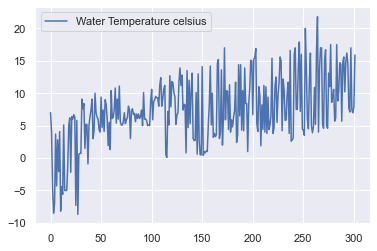

In [157]:
water_temp_2017_01_drop_na.plot()

In [107]:
water_temp_2017_01['Water Temperature celsius'].apply(lambda x: x != '').sum()

687

In [108]:
water_temp_2017_01[water_temp_2017_01['Water Temperature celsius'].apply(lambda x: x != '')]

,time,Water Temperature,Water Temperature celsius
0,2017-01-01 00:00:00,0,-9999.
1,2017-01-01 06:00:00,0,7.
2,2017-01-01 18:00:00,0,4.
3,2017-01-01 00:00:00,0,-4.6
4,2017-01-01 00:00:00,0,-8.5
...,...,...,...
682,2017-01-01 00:00:00,0,17.
683,2017-01-01 00:00:00,0,7.4
684,2017-01-01 00:00:00,0,7.
685,2017-01-01 00:00:00,0,7.9


In [ ]:
water_temp_2017_01.tail()

In [ ]:
water_temp[0:687:2206167]

In [ ]:
# create a water temp variable
pd_water_temp = []

for i in range(len(dt)):
    pd_water_temp.append(np.ma.array(water_temp[i:687:2206167]).filled())


In [ ]:
water_temp_2017_01.iloc[5,1]

In [ ]:
# time index
dt = np.arange(0, nc_fid.variables['time'].size)

for time_index in dt:
    water_temp_2017_01.iloc[time_index,1] = np.ma.array(water_temp[time_index:687:2206167]).filled()

In [ ]:
time_2017_01

In [ ]:
netCDF4.num2date(time_2017_01[:],time_2017_01.units)

In [ ]:
time_2017_01

In [ ]:
netCDF4.num2date(time_2017_01[1], nc_fid.variables['time'].units)

In [ ]:
netCDF4.num2date(time_2017_01[401], nc_fid.variables['time'].units)

In [ ]:
np.ma.array(water_temp[0:687:2206167]).filled()

In [ ]:
print(water_temp[600:687:2206167], water_temp.units) # time from 1 to 401

In [164]:
cd "E:\Hackathon_HackTheBay\Data\Water Temperature\chbv2h2017.txt"

E:\Hackathon_HackTheBay\Data\Water Temperature\chbv2h2017.txt


In [189]:
wt_2017_df = pd.read_csv("chbv2h2017.txt")

In [190]:
cd "E:\Hackathon_HackTheBay\Data\Water Temperature\chbv2h2018.txt"

E:\Hackathon_HackTheBay\Data\Water Temperature\chbv2h2018.txt


In [191]:
wt_2018_df = pd.read_csv("chbv2h2018.txt")

In [192]:
cd "E:\Hackathon_HackTheBay\Data\Water Temperature\chbv2h2019.txt"

E:\Hackathon_HackTheBay\Data\Water Temperature\chbv2h2019.txt


In [193]:
wt_2019_df = pd.read_csv("chbv2h2019.txt")

In [194]:
cd "E:\Hackathon_HackTheBay\Data\Water Temperature\chbv212020.txt"

E:\Hackathon_HackTheBay\Data\Water Temperature\chbv212020.txt


In [195]:
wt_2020_Jan_df = pd.read_csv("chbv212020.txt")

In [196]:
cd "E:\Hackathon_HackTheBay\Data\Water Temperature\chbv222020.txt"

E:\Hackathon_HackTheBay\Data\Water Temperature\chbv222020.txt


In [197]:
wt_2020_Feb_df = pd.read_csv("chbv222020.txt")

In [198]:
cd "E:\Hackathon_HackTheBay\Data\Water Temperature\chbv232020.txt"

E:\Hackathon_HackTheBay\Data\Water Temperature\chbv232020.txt


In [199]:
wt_2020_Mar_df = pd.read_csv("chbv232020.txt")

In [200]:
cd "E:\Hackathon_HackTheBay\Data\Water Temperature\chbv242020.txt"

E:\Hackathon_HackTheBay\Data\Water Temperature\chbv242020.txt


In [201]:
wt_2020_Apr_df = pd.read_csv("chbv242020.txt")

In [202]:
cd "E:\Hackathon_HackTheBay\Data\Water Temperature\chbv252020.txt"

E:\Hackathon_HackTheBay\Data\Water Temperature\chbv252020.txt


In [203]:
wt_2020_May_df = pd.read_csv("chbv252020.txt")

In [204]:
cd "E:\Hackathon_HackTheBay\Data\Water Temperature\chbv262020.txt"

E:\Hackathon_HackTheBay\Data\Water Temperature\chbv262020.txt


In [205]:
wt_2020_Jun_df = pd.read_csv("chbv262020.txt")

In [206]:
cd "E:\Hackathon_HackTheBay\Data\Water Temperature\2020\July"

E:\Hackathon_HackTheBay\Data\Water Temperature\2020\July


In [207]:
wt_2020_July_df = pd.read_csv("chbv2.txt")

In [208]:
pd.concat([wt_2017_df, wt_2018_df, wt_2019_df, wt_2020_Jan_df, wt_2020_Feb_df, wt_2020_Mar_df, wt_2020_Apr_df, 
           wt_2020_May_df, wt_2020_Jun_df, wt_2020_July_df], axis = 0)

,#YY MM DD hh mm WDIR WSPD GST WVHT DPD APD MWD PRES ATMP WTMP DEWP VIS TIDE
0,#yr mo dy hr mn degT m/s m/s m sec s...
1,2017 10 02 14 48 70 4.1 5.8 99.00 99.00 99....
2,2017 10 02 14 54 57 5.3 6.3 99.00 99.00 99....
3,2017 10 02 15 00 64 4.9 6.5 99.00 99.00 99....
4,2017 10 02 15 06 61 5.1 6.2 99.00 99.00 99....
...,...
6644,2020 07 31 23 30 102 3.6 4.5 99.00 99.00 99....
6645,2020 07 31 23 36 113 3.5 4.2 99.00 99.00 99....
6646,2020 07 31 23 42 100 3.1 3.7 99.00 99.00 99....
6647,2020 07 31 23 48 114 3.9 4.6 99.00 99.00 99....
